In [1]:
import math
import sklearn
import skimage
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from PIL import Image
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.measure import block_reduce
from skimage.restoration import denoise_tv_chambolle
from skimage.filters import median
from skimage.filters.rank import mean_bilateral
from skimage.filters.rank import mean
import glob

In [29]:
ims = [plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tilesets/John9/Full_size/*.tif")]


In [134]:
horizontal_number = 14
vertical_number = 19

In [31]:
ims_downscaled = []
for i in range(len(ims)):
    #print(i)
    ims_downscaled.append((skimage.transform.downscale_local_mean(ims[i], (4,4))).flatten())
ims_downscaled_array = np.array(ims_downscaled)    
ims_downscaled_array = ims_downscaled_array*((256*256)-1)/255


    

In [32]:
#ims = 0

In [33]:

for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        to_save = ims_downscaled_array[pos_in_list].reshape(512,768)
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
ims_downscaled = 0
ims_downscaled_array = 0

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
1

In [7]:
ims = 0

In [173]:
ims_downscaled_array = np.array([plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tilesets/John9/Downscaled/*.png")])*256

In [174]:
inboard_tile_numbers = [] #Numbers for the tiles which are considered "inboard", those which are at least 90% sample
black_tile_numbers = [] #Numbers for the tiles which are considered "black", those which are at least 90% empty space without plag
edge_tile_numbers = [] #Numbers for the tiles which are considered "edges", those which are between 
black_masks = []
bright_masks = []
plag_masks = []

black_threshold = 105
bright_threshold = 133

#manual_ignores = [357, 378] #For John2
#manual_ignores = [] #For John3
#manual_ignores = np.array([1, 2, 15, 435, 436, 449, 450, 451, 463, 464, 465, 466, 475, 476])-1 #For John4
#manual_ignores = np.array([1, 23, 34, 35, 48, 49, 72, 96, 120, 384, 408, 409, 432, 433, 456, 457, 479, 480, 481, 482, 503, 504])-1 #For John5


#ims_downscaled_array[manual_ignores] = ims_downscaled_array[manual_ignores]*0.1

for i in range(len(ims_downscaled_array)):
    black_masks.append(ims_downscaled_array[i]<black_threshold)
    bright_masks.append(ims_downscaled_array[i]>bright_threshold)
    plag_masks.append((black_threshold<ims_downscaled_array[i]) & (ims_downscaled_array[i]<bright_threshold))
    if np.mean(black_masks[i]) > 0.9:
        black_tile_numbers.append(i)
    elif np.mean(black_masks[i]) <0.1:
        inboard_tile_numbers.append(i)
    else:
        edge_tile_numbers.append(i)

        
        
        

black_masks = np.array(black_masks)
bright_masks = np.array(bright_masks)
plag_masks = np.array(plag_masks)

In [ ]:
np.mean(ims_downscaled_array[378])

In [175]:
#Take the tiles, threshold them, denoise them, unthreshold them, then replace the original plag pixels with them (the thresholding and unthresholding is to give the denoiser more contrast and therefore better signal-noise ratio)

ims_denoised = []
for i in range(len(ims_downscaled_array)):
#for i in [15]:
    thresholded = ims_downscaled_array[i].copy()
    #plt.imshow(thresholded)
    #print(np.mean(thresholded))
    thresholded[thresholded>bright_threshold] = bright_threshold
    thresholded[thresholded<black_threshold] = black_threshold
    thresholded = (thresholded -(black_threshold))*(256/(bright_threshold-black_threshold))
    #plt.imshow(thresholded)
    #print(np.mean(thresholded))
    de_noised = denoise_tv_chambolle(thresholded, weight = 5)
    #plt.imshow(de_noised)
    if np.max(de_noised) >256:
        de_noised = de_noised-(np.max(de_noised)-255.9)
    de_noised_bilat = (mean_bilateral((de_noised/256), selem=np.ones((5,5))))
    #print(np.mean(de_noised))
    #print(np.max(de_noised))
    #print(np.min(de_noised[plag_masks[i]==True]))
    un_thresholded = ((de_noised_bilat/256)*(bright_threshold-black_threshold))+black_threshold
    #plt.imshow(un_thresholded)
    #print(np.mean(un_thresholded))
    replaced = ims_downscaled_array[i].copy()
    replaced[plag_masks[i]] = un_thresholded[plag_masks[i]].copy()
    #plt.imshow(replaced)
    #print(np.mean(replaced))
    ims_denoised.append(replaced)
    #print(i)
ims_denoised = np.array(ims_denoised)
#ims_downscaled_array = 0

In [18]:
np.min(de_noised)

0.0

In [44]:
ims_denoised.shape

(377, 512, 768)

In [ ]:
plt.imshow(ims_denoised[100])

In [90]:
np.mean(replaced-ims_downscaled_array[15])

0.0

In [ ]:
replaced

143.79802
25.643112
148.97775
46.92406


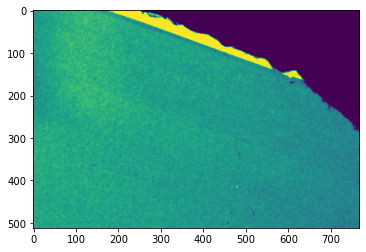

In [132]:
de_noised_medianed = median(de_noised, selem=np.ones((5,5)))
plt.imshow(de_noised_medianed)
print(np.mean(de_noised_medianed[de_noised_medianed>1]))
print(np.std(de_noised_medianed[de_noised_medianed>1]))
print(np.mean(de_noised_medianed[de_noised_medianed>np.mean(de_noised_medianed)]))
print(np.mean(de_noised_medianed[de_noised_medianed<np.mean(de_noised_medianed)]))

In [197]:
de_noised_medianed = mean_bilateral((de_noised/256), selem=np.ones((5,5)))
plt.imshow(de_noised_medianed)
print(np.mean(de_noised_medianed[de_noised_medianed>1]))
print(np.std(de_noised_medianed[de_noised_medianed>1]))
print(np.mean(de_noised_medianed[de_noised_medianed>np.mean(de_noised_medianed)]))
print(np.mean(de_noised_medianed[de_noised_medianed<np.mean(de_noised_medianed)]))

ValueError: The parameter `image` must be a 2-dimensional array

255.99615
0.90250295
12.129517
256.0
256.0
254.94318


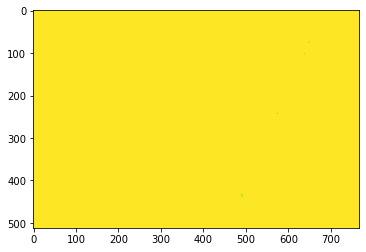

In [43]:
plt.imshow(de_noised)
print(np.mean(de_noised[de_noised>1]))
print(np.std(de_noised[de_noised>1]))
print(np.min(de_noised[de_noised>1]))
print(np.max(de_noised[de_noised>1]))
print(np.mean(de_noised[de_noised>np.mean(de_noised)]))
print(np.mean(de_noised[de_noised<np.mean(de_noised)]))

In [186]:
#help(median)

In [99]:
de_noised-thresholded

array([[ 0.9836502 ,  0.55856323, -0.535408  , ...,  0.        ,
         0.        ,  0.        ],
       [-0.02903748, -2.0840912 ,  1.4397812 , ...,  0.        ,
         0.        ,  0.        ],
       [-2.4137878 , -0.10058594,  2.7524185 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.50457764,  1.7129211 ,  0.00675964, ..., -0.9565506 ,
        -2.044548  ,  0.44610596],
       [-0.80815125, -2.9252014 ,  0.69844055, ...,  2.1510963 ,
         1.8890533 ,  1.7831802 ],
       [-0.38228607,  2.9852371 , -1.9367371 , ...,  1.0061569 ,
        -0.9658127 , -1.9996948 ]], dtype=float32)

In [100]:
np.max(ims_downscaled_array[15]-ims_denoised[0])

0.37342834

In [68]:
ims_denoised[0]-ims_downscaled_array[15]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
np.mean(ims_denoised[15])

118.42182

In [44]:
np.mean(ims_downscaled_array[15])

104.46528

In [176]:
#Take the inboard tiles and replace their dark areas with random values from their distribution of other values
inboard_downscaled_masked = []
for i in inboard_tile_numbers:
    sample_values = ims_denoised[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, ims_denoised[i].shape) #Make an array 
    
    inboard_downscaled_masked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
inboard_downscaled_masked = np.array(inboard_downscaled_masked)

In [177]:
np.mean(inboard_downscaled_masked, 0)

array([121.21656658, 121.01844221, 120.68187873, ..., 120.46116222,
       122.31209309, 121.68568811])

7.4646401358495496


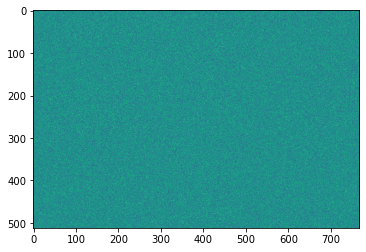

In [178]:
plt.imshow(np.mean(inboard_downscaled_masked,0).reshape(512,768))
print(np.max(np.mean(inboard_downscaled_masked,0)) - np.min(np.mean(inboard_downscaled_masked,0)))

In [97]:
#crack_ignored_sum = np.zeros((512,768))
#crack_ignored_count = np.zeros((512,768))
#for i in range(len(inboard_downscaled_masked)):
#    crack_ignored_sum = crack_ignored_sum+(inboard_downscaled_masked[i].reshape(512,768)*plag_masks[i])
#    crack_ignored_count = crack_ignored_count + np.ones((512,768))*plag_masks[i]
#crack_ignored_mean = crack_ignored_sum/crack_ignored_count
#
#plt.imshow(crack_ignored_mean)
        
    

In [179]:
#Do the primary/first order de-gridding

#This is the version of the processing which only took into account the mean of inboard tiles

mean_contrast = np.mean(inboard_downscaled_masked,0).reshape(512,768) - np.mean(np.mean(inboard_downscaled_masked,0))
#mean_contrast_smoothed = mean(((mean_contrast-np.min(mean_contrast))/(np.max(mean_contrast)-np.min(mean_contrast))), selem=np.ones((7,7)))
#plt.imshow(mean_contrast_smoothed)
mean_subtracted = ims_denoised-mean_contrast

In [180]:
(mean_contrast-np.min(mean_contrast))/(np.max(mean_contrast)-np.min(mean_contrast))

array([[0.49753057, 0.47098885, 0.42590115, ..., 0.58845501, 0.6924464 ,
        0.44116083],
       [0.42958283, 0.44101835, 0.47764347, ..., 0.64235325, 0.37258421,
        0.47623581],
       [0.55201605, 0.68254648, 0.67522356, ..., 0.46649391, 0.45951147,
        0.53921415],
       ...,
       [0.22793103, 0.55029402, 0.63586901, ..., 0.51275958, 0.49585181,
        0.37407695],
       [0.49058121, 0.51401673, 0.46782475, ..., 0.39710623, 0.60714553,
        0.5300569 ],
       [0.34646782, 0.66148057, 0.41254985, ..., 0.39633288, 0.6442927 ,
        0.5603764 ]])

In [181]:
print(np.mean(mean_contrast[mean_contrast<0]))
print(np.mean(mean_contrast[mean_contrast>0]))
#print(np.mean(mean_contrast_smoothed[mean_contrast_smoothed<0]))
#print(np.mean(mean_contrast_smoothed[mean_contrast_smoothed>0]))

-0.6412698361813307
0.6421314947897849


In [122]:
#Take the edge tiles and replace their dark areas with random values from their distribution of other values
edge_downscaled_masked = []
for i in edge_tile_numbers:
    sample_values = mean_subtracted[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, ims_downscaled_array[i].shape) #Make an array 
    
    edge_downscaled_masked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
edge_degridded_masked = np.array(edge_downscaled_masked)

In [182]:
#Take the inboard tiles and replace their dark areas with random values from their distribution of other values again
inboard_downscaled_remasked = []
for i in inboard_tile_numbers:
    sample_values = mean_subtracted[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, ims_downscaled_array[i].shape) #Make an array 
    
    inboard_downscaled_remasked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
inboard_degridded_remasked = np.array(inboard_downscaled_remasked)

4.495050608023632


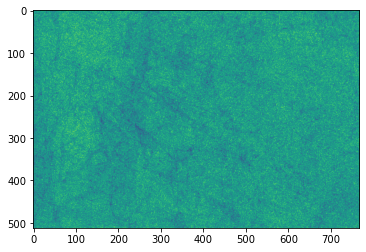

In [124]:
plt.imshow(np.mean(edge_degridded_masked,0).reshape(512,768))
print(np.max(np.mean(edge_degridded_masked,0)) - np.min(np.mean(edge_degridded_masked,0)))

7.219060672077205


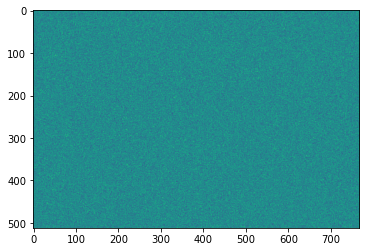

In [183]:
plt.imshow(np.mean(inboard_degridded_remasked,0).reshape(512,768))
print(np.max(np.mean(inboard_degridded_remasked,0)) - np.min(np.mean(inboard_degridded_remasked,0)))

In [184]:
#Do the second order de-gridding

#This is the version of the processing which only took into account the mean of inboard tiles

mean_contrast = np.mean(inboard_downscaled_remasked,0).reshape(512,768) - np.mean(np.mean(inboard_downscaled_remasked,0))
double_degridded = mean_subtracted-mean_contrast

In [185]:
#Take the inboard tiles and replace their dark areas with random values from their distribution of other values again
inboard_downscaled_reremasked = []
for i in inboard_tile_numbers:
    sample_values = double_degridded[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, ims_downscaled_array[i].shape) #Make an array 
    
    inboard_downscaled_reremasked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
inboard_degridded_reremasked = np.array(inboard_downscaled_reremasked)

7.917398834774971


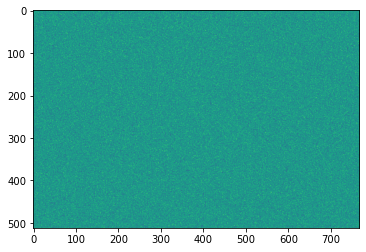

In [186]:
plt.imshow(np.mean(inboard_degridded_reremasked,0).reshape(512,768))
print(np.max(np.mean(inboard_degridded_reremasked,0)) - np.min(np.mean(inboard_degridded_reremasked,0)))

In [187]:
thing = np.mean(inboard_degridded_reremasked,0).reshape(512,768)
thing_contrast = thing-np.mean(thing)
print(np.mean(np.abs(thing_contrast)))
print(np.mean(thing[:, 0:100]))
print(np.mean(thing[:, 650:750]))
print(np.max(thing[:, 0:100]))
print(np.max(thing[:, 650:750]))

0.6353133284134261
121.25166055852506
121.25468117073817
124.53475541706145
124.52514566583994


In [188]:
#triple degrid for luck
mean_contrast = np.mean(inboard_downscaled_reremasked,0).reshape(512,768) - np.mean(np.mean(inboard_downscaled_reremasked,0))
triple_degridded = double_degridded-mean_contrast

In [189]:
#Take the inboard tiles and replace their dark areas with random values from their distribution of other values again again
inboard_downscaled_rereremasked = []
for i in inboard_tile_numbers:
    sample_values = triple_degridded[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, ims_downscaled_array[i].shape) #Make an array 
    
    inboard_downscaled_rereremasked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
inboard_degridded_rereremasked = np.array(inboard_downscaled_rereremasked)

7.598710982013017


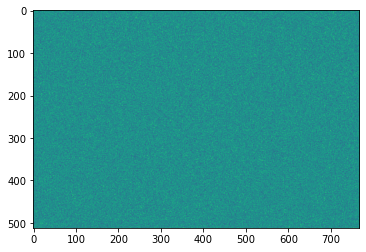

In [190]:
plt.imshow(np.mean(inboard_degridded_rereremasked,0).reshape(512,768))
print(np.max(np.mean(inboard_degridded_rereremasked,0)) - np.min(np.mean(inboard_degridded_rereremasked,0)))

In [191]:
thing = np.mean(inboard_degridded_rereremasked,0).reshape(512,768)
thing_contrast = thing-np.mean(thing)
print(np.mean(np.abs(thing_contrast)))
print(np.mean(thing[:, 0:100]))
print(np.mean(thing[:, 650:750]))
print(np.max(thing[:, 0:100]))
print(np.max(thing[:, 650:750]))

0.6312232070669115
121.25308688109826
121.2586097240706
124.60267915435386
124.57410744641518


In [192]:
#quadruple degrid for luck
mean_contrast = np.mean(inboard_downscaled_rereremasked,0).reshape(512,768) - np.mean(np.mean(inboard_downscaled_rereremasked,0))
quad_degridded = triple_degridded-mean_contrast

In [193]:
#Take the inboard tiles and replace their dark areas with random values from their distribution of other values again again
inboard_downscaled_rerereremasked = []
for i in inboard_tile_numbers:
    sample_values = quad_degridded[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, ims_downscaled_array[i].shape) #Make an array 
    
    inboard_downscaled_rerereremasked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
inboard_degridded_rerereremasked = np.array(inboard_downscaled_rerereremasked)

7.283555587555696


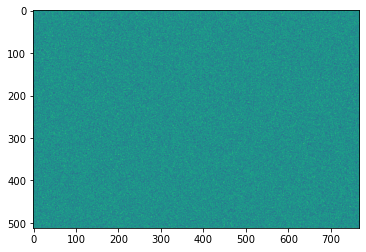

In [194]:
plt.imshow(np.mean(inboard_degridded_rerereremasked,0).reshape(512,768))
print(np.max(np.mean(inboard_degridded_rerereremasked,0)) - np.min(np.mean(inboard_degridded_rerereremasked,0)))

In [195]:
thing = np.mean(inboard_degridded_rerereremasked,0).reshape(512,768)
thing_contrast = thing-np.mean(thing)
print(np.mean(np.abs(thing_contrast)))
print(np.mean(thing[:, 0:100]))
print(np.mean(thing[:, 650:750]))
print(np.max(thing[:, 0:100]))
print(np.max(thing[:, 650:750]))

0.6278058217027579
121.25514989413128
121.25401626754048
124.65817082578901
124.58218115563469


In [196]:
#Take the edge tiles and replace their dark areas with random values from their distribution of other values again
edge_downscaled_remasked = []
for i in edge_tile_numbers:
    sample_values = quad_degridded[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, ims_downscaled_array[i].shape) #Make an array 
    
    edge_downscaled_remasked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
edge_degridded_remasked = np.array(edge_downscaled_remasked)

10.82608426232035


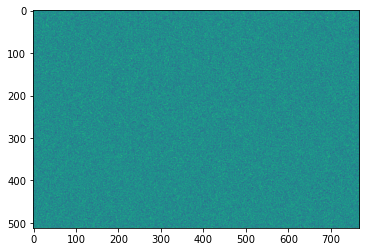

In [197]:
plt.imshow(np.mean(edge_degridded_remasked,0).reshape(512,768))
print(np.max(np.mean(edge_degridded_remasked,0)) - np.min(np.mean(edge_degridded_remasked,0)))

In [198]:
#Do the removal of the edge feature

mean_contrast = np.mean(edge_degridded_remasked,0).reshape(512,768) - np.mean(np.mean(edge_degridded_remasked,0))
double_degridded_barred = quad_degridded
double_degridded_barred[edge_tile_numbers] = double_degridded[edge_tile_numbers] - mean_contrast

In [199]:
#Take the edge tiles and replace their dark areas with random values from their distribution of other values again, again
edge_downscaled_reremasked = []
for i in edge_tile_numbers:
    sample_values = double_degridded_barred[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, ims_downscaled_array[i].shape) #Make an array 
    
    edge_downscaled_reremasked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
edge_degridded_reremasked = np.array(edge_downscaled_reremasked)

10.702569656945386


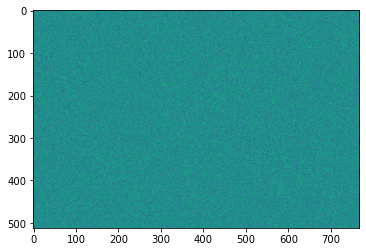

In [200]:
plt.imshow(np.mean(edge_degridded_reremasked,0).reshape(512,768))
print(np.max(np.mean(edge_degridded_reremasked,0)) - np.min(np.mean(edge_degridded_reremasked,0)))

In [201]:
#Do the removal of the edge feature

mean_contrast = np.mean(edge_degridded_reremasked,0).reshape(512,768) - np.mean(np.mean(edge_degridded_reremasked,0))
double_degridded_double_barred = double_degridded_barred
double_degridded_double_barred[edge_tile_numbers] = double_degridded_barred[edge_tile_numbers] - mean_contrast

In [202]:
#Take the edge tiles and replace their dark areas with random values from their distribution of other values again, again
edge_downscaled_rereremasked = []
for i in edge_tile_numbers:
    sample_values = double_degridded_double_barred[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, ims_downscaled_array[i].shape) #Make an array 
    
    edge_downscaled_rereremasked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
edge_degridded_rereremasked = np.array(edge_downscaled_rereremasked)

11.151232623347056


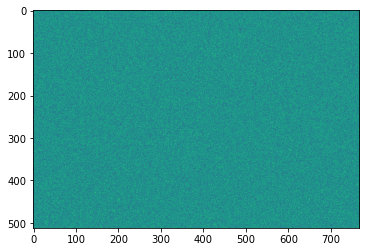

In [203]:
plt.imshow(np.mean(edge_degridded_rereremasked,0).reshape(512,768))
print(np.max(np.mean(edge_degridded_rereremasked,0)) - np.min(np.mean(edge_degridded_rereremasked,0)))

In [204]:
#Do the removal of the edge feature

mean_contrast = np.mean(edge_degridded_reremasked,0).reshape(512,768) - np.mean(np.mean(edge_degridded_reremasked,0))
double_degridded_triple_barred = double_degridded_double_barred
double_degridded_triple_barred[edge_tile_numbers] = double_degridded_double_barred[edge_tile_numbers] - mean_contrast

In [205]:
#Take the edge tiles and replace their dark areas with random values from their distribution of other values again, again
edge_downscaled_rerereremasked = []
for i in edge_tile_numbers:
    sample_values = double_degridded_triple_barred[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, ims_downscaled_array[i].shape) #Make an array 
    
    edge_downscaled_rerereremasked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
edge_degridded_rerereremasked = np.array(edge_downscaled_rerereremasked)

10.618824173513772


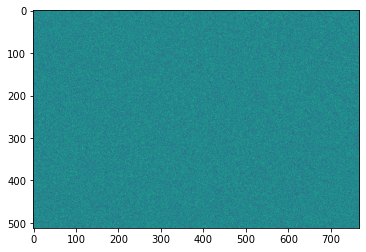

In [206]:
plt.imshow(np.mean(edge_degridded_rerereremasked,0).reshape(512,768))
print(np.max(np.mean(edge_degridded_rerereremasked,0)) - np.min(np.mean(edge_degridded_rerereremasked,0)))

In [207]:
quad_degridded = 0

In [208]:
triple_degridded = 0

2.54600927607882
2.668919794500951
2.4645371283296384
2.3673553944433223
2.468195620912084
2.3051599504894256
2.372874699354341
2.1260920573470656
2.151301061534042
1.9780881021357288
2.042714135901079
1.9251824403721116
2.0911748710570777
1.858272035323381
1.7950679027661351
1.8652560497674386
1.7888507867642431
1.6986599647513856
1.6375491514476437
1.6482988822725417
1.6459204864809749
1.6333259055681566
1.5849098366194738
1.6087013382526578
1.5022679324041661
1.6129754587046676
1.5872451178196627
1.4908263277575884


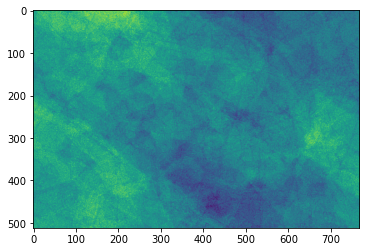

In [209]:
contrast_metric = 15
desired_contrast_metric = 1.5
input_tiles = double_degridded_triple_barred.copy()
while contrast_metric > desired_contrast_metric:
#for j in range(1):
    
    edges_many_masked = []
    for i in edge_tile_numbers:
        sample_values = input_tiles[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
        sample_mean = np.mean(sample_values[sample_values>1])
        sample_deviation = np.std(sample_values[sample_values>1])
        fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation/5, ims_downscaled_array[i].shape) #Make an array 

        edges_many_masked.append((fitting_array+sample_values).flatten())
        #print(sample_mean, sample_deviation)
    edges_many_masked = np.array(edges_many_masked)
    mean_contrast = np.mean(edges_many_masked,0).reshape(512,768) - np.mean(np.mean(edges_many_masked,0))
    input_tiles[edge_tile_numbers] = input_tiles[edge_tile_numbers] - mean_contrast
    contrast_metric = np.max(np.mean(edges_many_masked,0)) - np.min(np.mean(edges_many_masked,0))
    print(contrast_metric)

    
iteratively_processed = input_tiles
plt.imshow(np.mean(iteratively_processed[edge_tile_numbers], 0))


In [210]:
np.max(mean_contrast)

0.7085595155573685

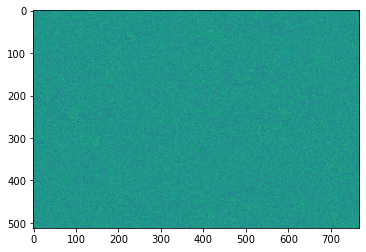

In [211]:
plt.imshow(mean_contrast)

In [212]:
iteratively_processed.shape

(266, 512, 768)

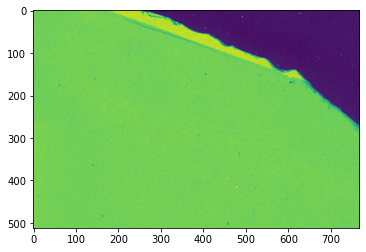

In [276]:
plt.imshow(iteratively_processed[15])

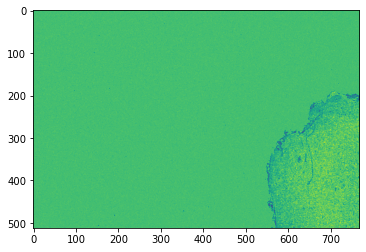

In [38]:
plt.imshow(edges_many_masked[3].reshape(512,768))

In [273]:
np.mean(np.mean(edges_many_masked,0))

120.11586624260771

In [274]:
np.mean(iteratively_processed[edge_tile_numbers])

63.196895782021485

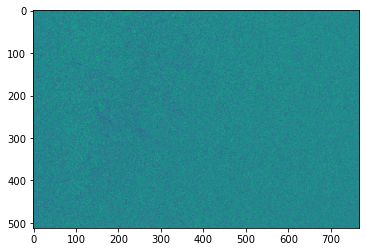

In [147]:
plt.imshow(np.mean(edges_many_masked, 0).reshape(512,768))

(214, 393216)
128.63895238832814
127.0015651602658
129.44302547529844
128.29549032278575


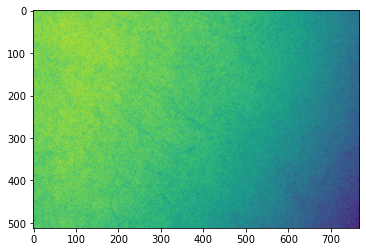

In [148]:
inboard_and_edge_downscaled_masked = np.append(edge_downscaled_masked, inboard_downscaled_masked, 0)
print(inboard_and_edge_downscaled_masked.shape)
plt.imshow(np.mean(inboard_and_edge_downscaled_masked,0).reshape(512,768))
thing = np.mean(inboard_and_edge_downscaled_masked,0).reshape(512,768)
print(np.mean(thing[:, 0:100]))
print(np.mean(thing[:, 650:750]))
print(np.max(thing[:, 0:100]))
print(np.max(thing[:, 650:750]))

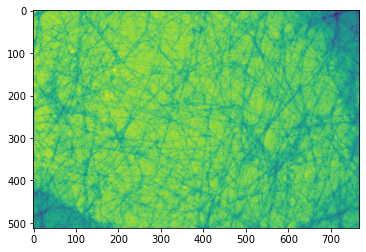

In [71]:
plt.imshow(np.mean(mean_subtracted[inboard_tile_numbers], 0))

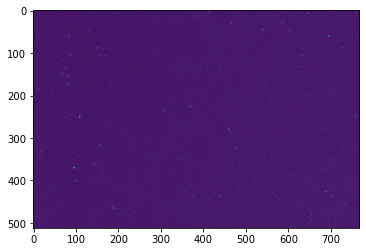

In [67]:
plt.imshow(mean_subtracted[28].reshape(512,768))

123.79860031983895
124.0814603586044
124.21495379388475
123.76702231201679


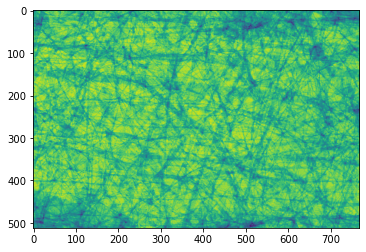

In [39]:
gradient_check = np.mean(iteratively_processed[inboard_tile_numbers], 0).reshape(512,768)
print(np.mean(gradient_check[0:100, :]))
print(np.mean(gradient_check[400:500, :]))
print(np.mean(gradient_check[:, 0:100]))
print(np.mean(gradient_check[:, 650:750]))
plt.imshow(gradient_check)

In [28]:
np.max(gradient_check)-np.min(gradient_check)

8.100187187665142e-13

In [36]:
are_you_sure = 0
if are_you_sure == 1:
    full_set = pd.Series(ims_downscaled_array.flatten())
    black_example = pd.Series(ims_downscaled[1].flatten())
    plain_example = pd.Series(ims_downscaled[36].flatten())
    bright_example = pd.Series(ims_downscaled[3].flatten())

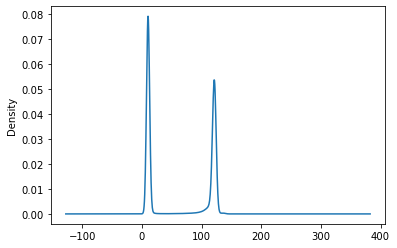

In [35]:
#ax = full_set.plot.kde()

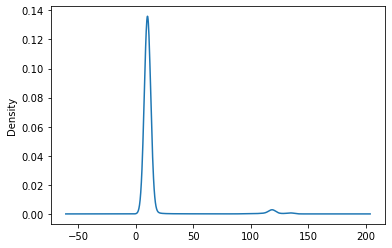

In [27]:
#ax = black_example.plot.kde()

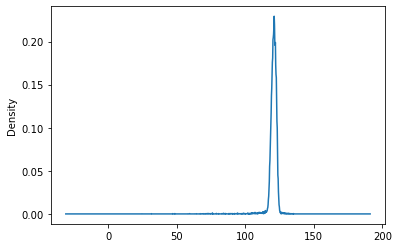

In [43]:
ax = plain_example.plot.kde(bw_method = 0.01)

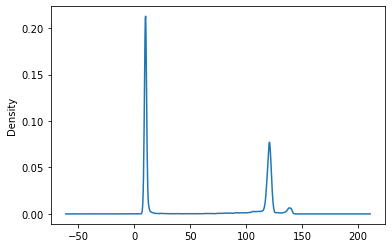

In [42]:
ax = bright_example.plot.kde(bw_method = 0.01)

In [69]:
pca = PCA(n_components=15)
pca.fit(inboard_downscaled_masked)

PCA(n_components=15)

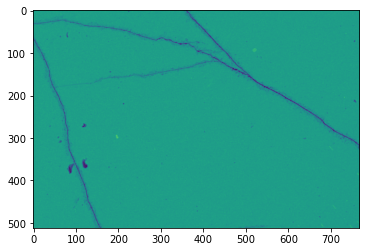

In [59]:
plt.imshow(black_mask_reapplied[35])

In [48]:
#This reapplies the black and bright pixels

new_processing_approach_tiffs = []


for i in range(len(iteratively_processed)):
    iteratively_processed[i][black_masks[j] == True] = ims_denoised[i][black_masks[j] == True]
    #iteratively_processed[i][bright_masks[j] == True] = ims_denoised[i][bright_masks[j] == True]
    

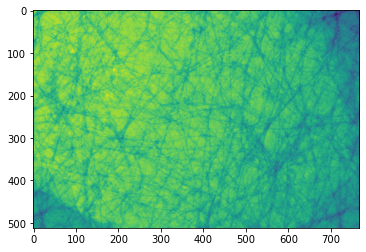

In [278]:
plt.imshow(np.mean(iteratively_processed[inboard_tile_numbers], 0))

In [85]:
#This is the version of the processing which only took into account the mean of inboard tiles
#
#new_processing_approach_tiffs = []
#black_mask_reapplied = []
#
#mean_contrast = pca.mean_.reshape(512,768) - np.mean(pca.mean_)
#mean_subtracted = ims_downscaled_array-mean_contrast
#for i in range(len(ims_downscaled_array)):
#    mean_subtracted_masked = np.zeros(ims_downscaled_array[i].shape)
#    mean_subtracted_masked[black_masks[i] == False] = mean_subtracted[i][black_masks[i] == False]
#    mean_subtracted_masked[black_masks[i] == True] = ims_downscaled_array[i][black_masks[i] == True]
#    black_mask_reapplied.append(mean_subtracted_masked) 
    
    

In [172]:
ims_downscaled_array[1]

array([[47.309315, 49.317158, 50.00467 , ..., 51.00859 , 47.996826,
        48.875748],
       [50.32108 , 52.075012, 50.06717 , ..., 47.309315, 50.446083,
        48.625744],
       [49.12575 , 52.012512, 47.43432 , ..., 48.750744, 49.317158,
        50.633587],
       ...,
       [48.56324 , 48.188236, 51.950012, ..., 47.996826, 47.62182 ,
        50.696087],
       [46.992905, 47.809322, 51.325   , ..., 45.426476, 45.73898 ,
        45.551476],
       [51.82501 , 51.70001 , 51.387505, ..., 45.988983, 46.930405,
        48.121826]], dtype=float32)

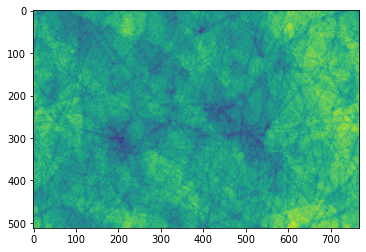

In [46]:
plt.imshow(np.mean(black_mask_reapplied, 0))

In [213]:
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        to_save = (iteratively_processed[pos_in_list].reshape(512,768))*256
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('iter_proc_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('iter_proc_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('iter_proc_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('iter_proc_'+str(i+1)+'_0'+str(j+1)+'.png')

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
1

In [94]:
black_mask_reapplied[2][black_mask_reapplied[2]<2]

array([1.00001526, 1.00001526, 0.        , 1.00001526, 1.00001526,
       1.00001526, 1.00001526, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.00001526, 0.        , 0.        , 0.        ,
       0.        , 1.00001526, 1.00001526, 0.        , 1.00001526,
       0.        , 0.        ])

In [90]:
mean_contrast

array([[ 0.53026364,  1.11104241,  0.32427321, ..., -1.93989774,
        -1.96168536, -2.70944632],
       [ 1.60681166,  1.57566516,  1.38076601, ..., -2.05584234,
        -2.52023872, -0.93525702],
       [ 1.85199079,  1.18669243,  1.62787371, ..., -1.63022845,
        -2.46950994, -2.20614094],
       ...,
       [ 0.64535616,  1.08841053,  0.30797554, ..., -2.90581924,
        -2.83925869, -2.56629106],
       [ 1.32227671,  0.42071294, -0.43277375, ..., -3.49533979,
        -3.21967747, -3.50990079],
       [ 0.61960167,  0.90103798,  0.49135408, ..., -3.35735072,
        -3.10276174, -3.9176746 ]])

In [7]:
#below_cutoff = [] #for old brightness fixing

In [8]:
#for i in range(len(ims_downscaled[0])):  #for old brightness fixing
#    if ims_downscaled[0][i]<15:
#        below_cutoff.append(ims_downscaled[0][i])

In [8]:
#below_cutoff

In [9]:
#(skimage.transform.downscale_local_mean(ims[1], (4,4))).flatten()

In [11]:
#ims_downscaled_array[13][0] = 255
#to_save = Image.fromarray(ims_downscaled_array[13].reshape(512,768))
#print(to_save)
#to_save.save('tiffnesstest.tif')

In [12]:
#does_imaging_break_it = Image.fromarray(ims_downscaled_array[14].reshape(512,768))
#does_imaging_break_it = np.array(does_imaging_break_it)
#does_imaging_break_it


In [13]:
#does_saving_break_it = Image.fromarray(ims_downscaled_array[14].reshape(512,768))
#does_saving_break_it.save('does_saving_break_it.tif')
#beep_boop = plt.imread('does_saving_break_it.tif')
#np.array(beep_boop)

In [14]:
print(np.mean(ims_downscaled_array[13]))
testing_thresholding = np.array(more_processed_tifs[12])
lower_threshold = 90 *256
upper_threshold = 140 *256
testing_thresholding[testing_thresholding>upper_threshold] = upper_threshold
testing_thresholding[testing_thresholding<lower_threshold] = lower_threshold
plt.imshow(testing_thresholding)
testing_thresholding = testing_thresholding.astype(np.uint16)
testing_thresholding = Image.fromarray(testing_thresholding)
#testing_thresholding.save('1_comps_removed_inboard.png')

120.00251213709514


NameError: name 'more_processed_tifs' is not defined

In [ ]:
testing_thresholding = np.array(more_processed_tifs[13])
testing_thresholding[testing_thresholding>upper_threshold] = upper_threshold
testing_thresholding[testing_thresholding<lower_threshold] = lower_threshold
plt.imshow(testing_thresholding)

In [ ]:
lower_threshold = 80 *256
upper_threshold = 120 *256
testing_thresholding = np.array(even_more_processed_tifs[12])
testing_thresholding[testing_thresholding>upper_threshold] = upper_threshold
testing_thresholding[testing_thresholding<lower_threshold] = lower_threshold
plt.imshow(testing_thresholding)

In [ ]:
#plt.imshow(Image.fromarray(np.array(processed_tifs[12])-np.array(more_processed_tifs[12])))

In [10]:
ipca = IncrementalPCA(n_components=15, batch_size=horizontal_number*vertical_number)
ipca_tiffs = ipca.fit_transform(ims_downscaled_array)

In [ ]:
ims_downscaled_array_copy = ims_downscaled_array.copy()
for i in range(len(ims_downscaled_array_copy)):
    mean = np.mean(ims_downscaled_array_copy[i])
    ims_downscaled_array_copy[i][ims_downscaled_array_copy[i]<40] = 120

plt.imshow(ims_downscaled_array_copy[12].reshape(512,768))

In [ ]:
thresholded_ipca = IncrementalPCA(n_components=100, batch_size=horizontal_number*vertical_number)
thresholded_ipca_tifs = thresholded_ipca.fit_transform(ims_downscaled_array_copy)

In [ ]:
#ipca.explained_variance_ratio_
plt.imshow(ipca.mean_.reshape(512,768))

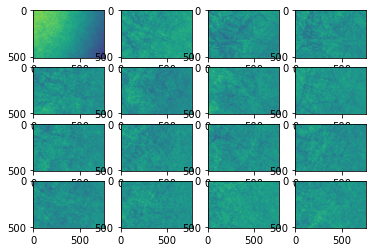

In [66]:
#Plotting the components next to eachother
fig, axs = plt.subplots(4,4)
#axs[0,0].imshow(thresholded_ipca.mean_.reshape(512,768))
#for i in range(15):
#    axs[np.floor_divide((i+1),4),np.mod((i+1),4)].imshow(thresholded_ipca.components_[i].reshape(512,768))
axs[0,0].imshow(pca.mean_.reshape(512,768))
for i in range(15):
    axs[np.floor_divide((i+1),4),np.mod((i+1),4)].imshow(pca.components_[i].reshape(512,768))
plt.savefig('PCA components.svg', dpi = 500)

In [19]:
plt.savefig('PCA components for poster.svg', dpi = 500)

<Figure size 432x288 with 0 Axes>

In [87]:
nmf_model = NMF(n_components = 15, init='random', random_state = 0, max_iter = 1000)
nmf_fitted = nmf_model.fit_transform(ims_downscaled_array)
nmf_components = nmf_model.components_

C:\Users\rwfbl\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [235]:
thresholded_ipca.mean_

array([70.93854776, 71.28259909, 71.08956635, ..., 70.94344684,
       71.03426735, 70.88713267])

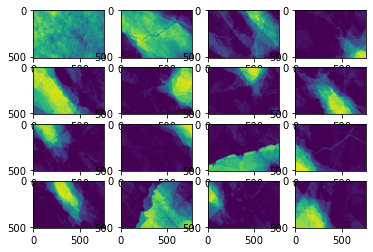

In [88]:
fig, axs = plt.subplots(4,4)
axs[0,0].imshow(ipca.mean_.reshape(512,768))
for i in range(15):
    axs[np.floor_divide((i+1),4),np.mod((i+1),4)].imshow(nmf_components[i].reshape(512,768))
plt.savefig('NMF components for Jmac to see.png', dpi = 500)

In [125]:
plt.imshow((ipca.mean_.reshape(512,768)))
ipca_tiffs[0]

AttributeError: 'float' object has no attribute 'reshape'

In [124]:
for i in range(len(ipca_tiffs)):
    ipca_tiffs[i][0] = 0
    ipca_tiffs[i][1] = 0
    ipca_tiffs[i][2] = 0
    ipca_tiffs[i][3] = 0
component_stripped = ipca.inverse_transform(ipca_tiffs)
plt.imshow(component_stripped[15].reshape(512,768))
to_save = Image.fromarray(component_stripped[15].reshape(512,768))
to_save.save('four_comps_removed_example_pca.png')

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [122]:
for i in range(len(nmf_fitted)):
    nmf_fitted[i][0] = 0
    nmf_fitted[i][1] = 0
    nmf_fitted[i][2] = 0
    nmf_fitted[i][3] = 0
component_stripped = NMF.inverse_transform(nmf_model, W=nmf_fitted)
plt.imshow(component_stripped[15].reshape(512,768))

MemoryError: Unable to allocate 627. MiB for an array with shape (209, 393216) and data type float64

In [51]:


#test = Image.fromarray(ims_downscaled_array[101].reshape(512,768)-ipca.mean_.reshape(512,768))
#plt.imshow(test)

In [52]:
#plt.imshow(ims_downscaled_array[101].reshape(512,768))

In [53]:
#test.save('test.tif')

In [162]:
processed_tifs = []
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        #brightness_scale_factor = np.mean(ims_downscaled_array[pos_in_list])/np.mean(ims_downscaled_array[pos_in_list]-ipca.mean_)
        #print(brightness_scale_factor)
        #to_save = Image.fromarray(ims_downscaled_array[pos_in_list].reshape(512,768)-ipca.mean_.reshape(512,768))
        mean_subtracted = ims_downscaled_array[pos_in_list]-ipca.mean_
        non_zero_black_count = np.count_nonzero(ims_downscaled_array[pos_in_list] < 15) #Count the number of pixels which are essentially black
        below_cutoff = []
        for l in range(len(ims_downscaled[pos_in_list])):
            if ims_downscaled[pos_in_list][l]<15:
                below_cutoff.append(ims_downscaled[pos_in_list][l])
        if len(below_cutoff)>3000:
            mean_of_the_zeros = np.mean(below_cutoff)
        else:
            mean_of_the_zeros = 10
        
        zero_black_count = len(ims_downscaled_array[pos_in_list])-np.count_nonzero(ims_downscaled_array[pos_in_list])
        black_count = non_zero_black_count + zero_black_count
        
        #print(black_count)
        for k in np.arange(-60,255,1):
            if k <= 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k)
            if k > 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k) + len(mean_subtracted)-np.count_nonzero(mean_subtracted)
            if mean_subtracted_black_pixels > black_count:
                threshold = k-1
                break
        print(threshold)
        
        mean_subtracted[mean_subtracted<threshold] = threshold #replace elements below the threshold with the threshold
        
        #at this point there should be as many threshold values in the processed image as there were zeroes in the original
        
        #Bear in mind that the mean of a "totally black" initial tile is actually still about 10,
        #so I should probably make zero brightness pixels actually 10s to avoid inflating the scale factor
       
        mean_subtracted_zeroed = mean_subtracted - threshold
        
        #Now there should be as many pixels of value 0 as there were pixels of < 15 initially
        
        mean_subtracted_zeroed_mean = np.mean(mean_subtracted_zeroed)
        original_mean = np.mean(ims_downscaled_array[pos_in_list])
        scale_factor = (original_mean-mean_of_the_zeros)/mean_subtracted_zeroed_mean #the 10 is to cope with that essentially being the zero value
        mean_subtracted_zeroed_scaled = (mean_subtracted_zeroed*scale_factor)+mean_of_the_zeros 
    
        #this should result in an image with a lowest value of approximately 10 and the same mean brightness as its original
        
        mean_subtracted_zeroed_scaled[mean_subtracted_zeroed_scaled>255] = 255
        mean_subtracted_zeroed_scaled = mean_subtracted_zeroed_scaled*256
        
        to_save = mean_subtracted_zeroed_scaled.reshape(512,768)
        #non_zero_black_count_check = np.count_nonzero(mean_subtracted_zeroed < 11)
        #print(non_zero_black_count)
        #print(non_zero_black_count_check)
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('degridded_downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('degridded_downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('degridded_downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('degridded_downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        processed_tifs.append(to_save)

1 1
-47
1 2
-47
1 3
-48
1 4
-47
1 5
-47
1 6
-47
1 7
-47
1 8
-47
1 9
-47
1 10
-47
1 11
-47
2 1
-47
2 2
-48
2 3
-46
2 4
-44
2 5
57
2 6
-47
2 7
-47
2 8
-47
2 9
-47
2 10
-47
2 11
-47
3 1
-48
3 2
-49
3 3
-47
3 4
-42
3 5
-35
3 6
-47
3 7
-47
3 8
-47
3 9
-47
3 10
-47
3 11
-47
4 1
-48
4 2
-36
4 3
-47
4 4
-48
4 5
-45
4 6
-47
4 7
-47
4 8
-47
4 9
-47
4 10
-47
4 11
-47
5 1
-48
5 2
-46
5 3
-46
5 4
-47
5 5
-45
5 6
-48
5 7
-47
5 8
-47
5 9
-47
5 10
-47
5 11
-47
6 1
-47
6 2
-48
6 3
-47
6 4
-47
6 5
-46
6 6
-48
6 7
-47
6 8
-47
6 9
-47
6 10
-47
6 11
-47
7 1
-47
7 2
-48
7 3
-48
7 4
-48
7 5
-47
7 6
-45
7 7
-47
7 8
-47
7 9
-47
7 10
-47
7 11
-47
8 1
-47
8 2
-48
8 3
-47
8 4
-46
8 5
-49
8 6
-47
8 7
-46
8 8
-47
8 9
-47
8 10
-47
8 11
-47
9 1
-47
9 2
-48
9 3
-47
9 4
-48
9 5
-45
9 6
-49
9 7
-47
9 8
-48
9 9
-47
9 10
-47
9 11
-47
10 1
-47
10 2
-48
10 3
-47
10 4
-46
10 5
-46
10 6
-44
10 7
-47
10 8
-45
10 9
-48
10 10
-47
10 11
-47
11 1
-47
11 2
-47
11 3
-48
11 4
-46
11 5
-46
11 6
-47
11 7
-48
11 8
-47
11 9
-46
11 10
-47

In [56]:
ipca.mean_

array([80.77411265, 80.72357253, 80.77334105, ..., 79.15393519,
       78.8908179 , 78.82310957])

In [11]:
components_to_remove = 4
more_processed_tifs = []
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        #brightness_scale_factor = np.mean(ims_downscaled_array[pos_in_list])/np.mean(ims_downscaled_array[pos_in_list]-ipca.mean_)
        #print(brightness_scale_factor)
        #to_save = Image.fromarray(ims_downscaled_array[pos_in_list].reshape(512,768)-ipca.mean_.reshape(512,768))
        mean_subtracted = ims_downscaled_array[pos_in_list]-ipca.mean_
        for m in range(components_to_remove):
            component_subtracted = mean_subtracted - (ipca_tiffs[pos_in_list][m]*ipca.components_[m])
        mean_subtracted = component_subtracted
        
        
        
        non_zero_black_count = np.count_nonzero(ims_downscaled_array[pos_in_list] < 15) #Count the number of pixels which are essentially black
        below_cutoff = []
        for l in range(len(ims_downscaled[pos_in_list])):
            if ims_downscaled[pos_in_list][l]<15:
                below_cutoff.append(ims_downscaled[pos_in_list][l])
        if len(below_cutoff)>3000:
            mean_of_the_zeros = np.mean(below_cutoff)
        else:
            mean_of_the_zeros = 10
        
        zero_black_count = len(ims_downscaled_array[pos_in_list])-np.count_nonzero(ims_downscaled_array[pos_in_list])
        black_count = non_zero_black_count + zero_black_count
        
        #print(black_count)
        for k in np.arange(-60,255,1):
            if k <= 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k)
            if k > 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k) + len(mean_subtracted)-np.count_nonzero(mean_subtracted)
            if mean_subtracted_black_pixels > black_count:
                threshold = k-1
                break
        print(threshold)
        
        mean_subtracted[mean_subtracted<threshold] = threshold #replace elements below the threshold with the threshold
        
        #at this point there should be as many threshold values in the processed image as there were zeroes in the original
        
        #Bear in mind that the mean of a "totally black" initial tile is actually still about 10,
        #so I should probably make zero brightness pixels actually 10s to avoid inflating the scale factor
       
        mean_subtracted_zeroed = mean_subtracted - threshold
        
        #Now there should be as many pixels of value 0 as there were pixels of < 15 initially
        
        mean_subtracted_zeroed_mean = np.mean(mean_subtracted_zeroed)
        original_mean = np.mean(ims_downscaled_array[pos_in_list])
        scale_factor = (original_mean-mean_of_the_zeros)/mean_subtracted_zeroed_mean #the 10 is to cope with that essentially being the zero value
        mean_subtracted_zeroed_scaled = (mean_subtracted_zeroed*scale_factor)+mean_of_the_zeros 
    
        #this should result in an image with a lowest value of approximately 10 and the same mean brightness as its original
        
        mean_subtracted_zeroed_scaled[mean_subtracted_zeroed_scaled>255] = 255
        mean_subtracted_zeroed_scaled = mean_subtracted_zeroed_scaled*256
        
        to_save = mean_subtracted_zeroed_scaled.reshape(512,768)
        #non_zero_black_count_check = np.count_nonzero(mean_subtracted_zeroed < 11)
        #print(non_zero_black_count)
        #print(non_zero_black_count_check)
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('degridded_downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('degridded_downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('degridded_downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('degridded_downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        more_processed_tifs.append(to_save)

1 1
-46
1 2
-43
1 3
-37
1 4
-38
1 5
-42
1 6
-46
1 7
-46
1 8
-46
1 9
-46
1 10
-46
1 11
-46
2 1
-46
2 2
-41
2 3
-45
2 4
-45
2 5
-24
2 6
-25
2 7
-46
2 8
-46
2 9
-46
2 10
-46
2 11
-46
3 1
-47
3 2
-48
3 3
-48
3 4
-41
3 5
-33
3 6
-45
3 7
-46
3 8
-46
3 9
-46
3 10
-46
3 11
-46
4 1
-34
4 2
-35
4 3
-47
4 4
-49
4 5
-43
4 6
-41
4 7
-19
4 8
-46
4 9
-46
4 10
-46
4 11
-46
5 1
-22
5 2
-45
5 3
-47
5 4
-49
5 5
-45
5 6
-48
5 7
-26
5 8
-46
5 9
-46
5 10
-46
5 11
-46
6 1
-32
6 2
-25
6 3
-45
6 4
-49
6 5
-47
6 6
-49
6 7
-25
6 8
-46
6 9
-46
6 10
-46
6 11
-46
7 1
-46
7 2
-37
7 3
-48
7 4
-46
7 5
-47
7 6
-43
7 7
-45
7 8
-24
7 9
-46
7 10
-46
7 11
-46
8 1
-46
8 2
-31
8 3
-46
8 4
-46
8 5
-48
8 6
-47
8 7
-47
8 8
-18
8 9
-46
8 10
-46
8 11
-46
9 1
-46
9 2
-27
9 3
-47
9 4
-48
9 5
-45
9 6
-50
9 7
-48
9 8
-45
9 9
-19
9 10
-47
9 11
-46
10 1
-46
10 2
-18
10 3
-47
10 4
-46
10 5
-46
10 6
-44
10 7
-47
10 8
-45
10 9
-47
10 10
-42
10 11
-46
11 1
-46
11 2
-47
11 3
-18
11 4
-46
11 5
-46
11 6
-46
11 7
-48
11 8
-46
11 9
-46
11 10
-3

In [248]:
more_processed_tifs

[]

In [297]:
components_to_remove = 4
even_more_processed_tifs = []
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        #brightness_scale_factor = np.mean(ims_downscaled_array[pos_in_list])/np.mean(ims_downscaled_array[pos_in_list]-ipca.mean_)
        #print(brightness_scale_factor)
        #to_save = Image.fromarray(ims_downscaled_array[pos_in_list].reshape(512,768)-ipca.mean_.reshape(512,768))
        mean_subtracted = ims_downscaled_array_copy[pos_in_list]-thresholded_ipca.mean_
        for m in range(components_to_remove):
            component_subtracted = mean_subtracted - (thresholded_ipca_tifs[pos_in_list][m]*thresholded_ipca.components_[m])
        mean_subtracted = component_subtracted
        
        
        
        non_zero_black_count = np.count_nonzero(ims_downscaled_array_copy[pos_in_list] < 15) #Count the number of pixels which are essentially black
        below_cutoff = []
        for l in range(len(ims_downscaled_array_copy[pos_in_list])):
            if ims_downscaled[pos_in_list][l]<15:
                below_cutoff.append(ims_downscaled[pos_in_list][l])
        if len(below_cutoff)>3000:
            mean_of_the_zeros = np.mean(below_cutoff)
        else:
            mean_of_the_zeros = 10
        
        zero_black_count = len(ims_downscaled_array_copy[pos_in_list])-np.count_nonzero(ims_downscaled_array[pos_in_list])
        black_count = non_zero_black_count + zero_black_count
        
        #print(black_count)
        for k in np.arange(-60,255,1):
            if k <= 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k)
            if k > 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k) + len(mean_subtracted)-np.count_nonzero(mean_subtracted)
            if mean_subtracted_black_pixels > black_count:
                threshold = k-1
                break
        print(threshold)
        
        mean_subtracted[mean_subtracted<threshold] = threshold #replace elements below the threshold with the threshold
        
        #at this point there should be as many threshold values in the processed image as there were zeroes in the original
        
        #Bear in mind that the mean of a "totally black" initial tile is actually still about 10,
        #so I should probably make zero brightness pixels actually 10s to avoid inflating the scale factor
       
        mean_subtracted_zeroed = mean_subtracted - threshold
        
        #Now there should be as many pixels of value 0 as there were pixels of < 15 initially
        
        mean_subtracted_zeroed_mean = np.mean(mean_subtracted_zeroed)
        original_mean = np.mean(ims_downscaled_array[pos_in_list])
        scale_factor = (original_mean-mean_of_the_zeros)/mean_subtracted_zeroed_mean
        mean_subtracted_zeroed_scaled = (mean_subtracted_zeroed*scale_factor)+mean_of_the_zeros 
    
        #this should result in an image with a lowest value of approximately 10 and the same mean brightness as its original
        
        mean_subtracted_zeroed_scaled[mean_subtracted_zeroed_scaled>255] = 255
        mean_subtracted_zeroed_scaled = mean_subtracted_zeroed_scaled*256
        
        to_save = mean_subtracted_zeroed_scaled.reshape(512,768)
        #non_zero_black_count_check = np.count_nonzero(mean_subtracted_zeroed < 11)
        #print(non_zero_black_count)
        #print(non_zero_black_count_check)
        #to_save = to_save.astype(np.uint16)
        #to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            #to_save.save('degridded_downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            #to_save.save('degridded_downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            #to_save.save('degridded_downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            #to_save.save('degridded_downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        even_more_processed_tifs.append(to_save)

1 1
-3
1 2
-3
1 3
-3
1 4
-34
1 5
-6
1 6
-3
1 7
-3
1 8
-3
1 9
-3
1 10
-3
1 11
-3
2 1
-3
2 2
-3
2 3
-3
2 4
-3
2 5
-3
2 6
-9
2 7
-3
2 8
-3
2 9
-3
2 10
-3
2 11
-3
3 1
-3
3 2
-4
3 3
-3
3 4
-3
3 5
-3
3 6
-10
3 7
-3
3 8
-3
3 9
-3
3 10
-3
3 11
-3
4 1
-3
4 2
-3
4 3
-3
4 4
-3
4 5
-3
4 6
-3
4 7
-8
4 8
-3
4 9
-3
4 10
-3
4 11
-3
5 1
-3
5 2
-3
5 3
-3
5 4
-3
5 5
-3
5 6
-3
5 7
-7
5 8
-3
5 9
-3
5 10
-3
5 11
-3
6 1
-3
6 2
-4
6 3
-3
6 4
-3
6 5
-3
6 6
-4
6 7
-9
6 8
-3
6 9
-3
6 10
-3
6 11
-3
7 1
-3
7 2
-4
7 3
-3
7 4
-3
7 5
-3
7 6
-3
7 7
-3
7 8
-9
7 9
-3
7 10
-3
7 11
-3
8 1
-3
8 2
-4
8 3
-3
8 4
-3
8 5
-4
8 6
-3
8 7
-3
8 8
-19
8 9
-3
8 10
-3
8 11
-3
9 1
-3
9 2
-4
9 3
-3
9 4
-3
9 5
-4
9 6
-3
9 7
-3
9 8
-3
9 9
-10
9 10
-3
9 11
-3
10 1
-3
10 2
-4
10 3
-3
10 4
-3
10 5
-3
10 6
-3
10 7
-4
10 8
-3
10 9
-3
10 10
-13
10 11
-3
11 1
-3
11 2
-3
11 3
-4
11 4
-3
11 5
-3
11 6
-3
11 7
-3
11 8
-6
11 9
-3
11 10
-3
11 11
-6
12 1
-3
12 2
-3
12 3
-3
12 4
-3
12 5
-3
12 6
-3
12 7
-15
12 8
-3
12 9
-3
12 10
-3
12 11
-8
13 1
-3
13 2


In [300]:
#even_more_processed_tifs_array = []
#for i in range(len(even_more_processed_tifs)):
#    thing = 1
#    even_more_processed_tifs_array.append(even_more_processed_tifs[i].flatten())
#even_more_processed_tifs_array[i]

array([31320.57458663, 28360.52000977, 30658.59269537, ...,
       40057.00112354, 38010.1283163 , 41014.08890961])

In [11]:
processed_direct_import = [plt.imread(path) for path in glob.glob("Processed pngs/*.png")]
np.array(processed_direct_import)


array([[[0.47780576, 0.4324712 , 0.46755168, ..., 0.59008163,
         0.62534523, 0.6324407 ],
        [0.35259023, 0.35326162, 0.3881285 , ..., 0.59693295,
         0.6170901 , 0.577966  ],
        [0.34505227, 0.38760966, 0.39081407, ..., 0.60622567,
         0.6122988 , 0.5569238 ],
        ...,
        [0.42322424, 0.39822996, 0.41245136, ..., 0.60028994,
         0.5895018 , 0.5941558 ],
        [0.43341726, 0.44078737, 0.45423058, ..., 0.57605857,
         0.5982452 , 0.6002289 ],
        [0.45653468, 0.45975432, 0.39726862, ..., 0.61103225,
         0.57930875, 0.6261387 ]],

       [[0.45304036, 0.41029984, 0.4440833 , ..., 0.56015867,
         0.5920348 , 0.5988861 ],
        [0.33421835, 0.33522546, 0.3689479 , ..., 0.5651484 ,
         0.584329  , 0.5482719 ],
        [0.32738233, 0.36855116, 0.37033647, ..., 0.5741207 ,
         0.57964444, 0.5267872 ],
        ...,
        [0.4029755 , 0.3794003 , 0.392813  , ..., 0.9008164 ,
         0.688426  , 0.5656367 ],
        [0.4

In [31]:
even_more_processed_tifs_array = []
for i in range(len(processed_direct_import)):
    thing = 1
    even_more_processed_tifs_array.append(processed_direct_import[i].flatten())
even_more_processed_tifs_array[i]

array([0.47791258, 0.43274587, 0.4678111 , ..., 0.6112306 , 0.5799954 ,
       0.6258335 ], dtype=float32)

In [14]:
double_ipca = IncrementalPCA(n_components=15, batch_size=horizontal_number*vertical_number)
double_ipca_tiffs = double_ipca.fit_transform(even_more_processed_tifs_array)

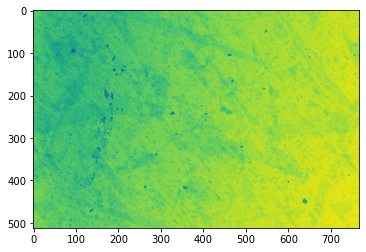

In [16]:
plt.imshow(double_ipca.mean_.reshape(512,768))

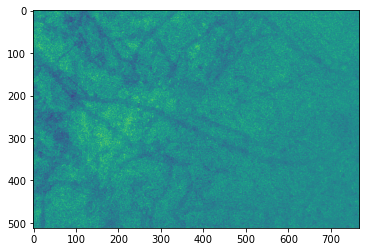

In [53]:
plt.imshow(double_ipca.components_[7].reshape(512,768))

(209, 512, 768)

In [54]:
components_to_remove = 1
double_processed_tifs = []
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        #brightness_scale_factor = np.mean(ims_downscaled_array[pos_in_list])/np.mean(ims_downscaled_array[pos_in_list]-ipca.mean_)
        #print(brightness_scale_factor)
        #to_save = Image.fromarray(ims_downscaled_array[pos_in_list].reshape(512,768)-ipca.mean_.reshape(512,768))
        mean_subtracted = even_more_processed_tifs_array[pos_in_list]-double_ipca.mean_
        non_zero_black_count = np.count_nonzero(even_more_processed_tifs_array[pos_in_list] < 15) #Count the number of pixels which are essentially black
        below_cutoff = []
        for l in range(len(even_more_processed_tifs_array[pos_in_list])):
            if even_more_processed_tifs_array[pos_in_list][l]<15:
                below_cutoff.append(even_more_processed_tifs_array[pos_in_list][l])
        if len(below_cutoff)>3000:
            mean_of_the_zeros = np.mean(below_cutoff)
        else:
            mean_of_the_zeros = 10
            
            
        for m in range(components_to_remove):
            component_subtracted = mean_subtracted - (double_ipca_tiffs[pos_in_list][m]*double_ipca.components_[m])
        mean_subtracted = component_subtracted
        
        zero_black_count = len(even_more_processed_tifs_array[pos_in_list])-np.count_nonzero(even_more_processed_tifs_array[pos_in_list])
        black_count = non_zero_black_count + zero_black_count
        
        #print(black_count)
        for k in np.arange(-60,255,1):
            if k <= 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k)
            if k > 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k) + len(mean_subtracted)-np.count_nonzero(mean_subtracted)
            if mean_subtracted_black_pixels > black_count:
                threshold = k-1
            else:
                threshold = 10
                break
        print(threshold)
        
        mean_subtracted[mean_subtracted<threshold] = threshold #replace elements below the threshold with the threshold
        
        #at this point there should be as many threshold values in the processed image as there were zeroes in the original
        
        #Bear in mind that the mean of a "totally black" initial tile is actually still about 10,
        #so I should probably make zero brightness pixels actually 10s to avoid inflating the scale factor
       
        mean_subtracted_zeroed = mean_subtracted - threshold
        
        #Now there should be as many pixels of value 0 as there were pixels of < 15 initially
        
        mean_subtracted_zeroed_mean = np.mean(mean_subtracted_zeroed)
        original_mean = np.mean(ims_downscaled_array[pos_in_list])
        scale_factor = (original_mean-mean_of_the_zeros)/mean_subtracted_zeroed_mean #the 10 is to cope with that essentially being the zero value
        mean_subtracted_zeroed_scaled = (mean_subtracted_zeroed*scale_factor)+mean_of_the_zeros 
    
        #this should result in an image with a lowest value of approximately 10 and the same mean brightness as its original
        
        mean_subtracted_zeroed_scaled[mean_subtracted_zeroed_scaled>255] = 255
        mean_subtracted_zeroed_scaled = mean_subtracted_zeroed_scaled*256
        
        to_save = mean_subtracted_zeroed_scaled.reshape(512,768)
        #non_zero_black_count_check = np.count_nonzero(mean_subtracted_zeroed < 11)
        #print(non_zero_black_count)
        #print(non_zero_black_count_check)
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('double_degridded_downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('double_degridded_downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('double_degridded_downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('double_degridded_downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        double_processed_tifs.append(to_save)

1 1
0
1 2
0
1 3
0
1 4
0
1 5
0
1 6
0
1 7
0
1 8
0
1 9
0
1 10
0
1 11
0
2 1
0
2 2
0
2 3
0
2 4
0
2 5
0
2 6
0
2 7
0
2 8
0
2 9
0
2 10
0
2 11
0
3 1
0
3 2
0
3 3
0
3 4
0
3 5
0
3 6
0
3 7
0
3 8
0
3 9
0
3 10
0
3 11
0
4 1
0
4 2
0
4 3
0
4 4
0
4 5
0
4 6
0
4 7
0
4 8
0
4 9
0
4 10
0
4 11
0
5 1
0
5 2
0
5 3
0
5 4
0
5 5
0
5 6
0
5 7
0
5 8
0
5 9
0
5 10
0
5 11
0
6 1
0
6 2
0
6 3
0
6 4
0
6 5
0
6 6
0
6 7
0
6 8
0
6 9
0
6 10
0
6 11
0
7 1
0
7 2
0
7 3
0
7 4
0
7 5
0
7 6
0
7 7
0
7 8
0
7 9
0
7 10
0
7 11
0
8 1
0
8 2
0
8 3
0
8 4
0
8 5
0
8 6
0
8 7
0
8 8
0
8 9
0
8 10
0
8 11
0
9 1
0
9 2
0
9 3
0
9 4
0
9 5
0
9 6
0
9 7
0
9 8
0
9 9
0
9 10
0
9 11
0
10 1
0
10 2
0
10 3
0
10 4
0
10 5
0
10 6
0
10 7
0
10 8
0
10 9
0
10 10
0
10 11
0
11 1
0
11 2
0
11 3
0
11 4
0
11 5
0
11 6
0
11 7
0
11 8
0
11 9
0
11 10
0
11 11
0
12 1
0
12 2
0
12 3
0
12 4
0
12 5
0
12 6
0
12 7
0
12 8
0
12 9
0
12 10
0
12 11
0
13 1
0
13 2
0
13 3
0
13 4
0
13 5
0
13 6
0
13 7
0
13 8
0
13 9
0
13 10
0
13 11
0
14 1
0
14 2
0
14 3
0
14 4
0
14 5
0
14 6
0
14 7
0
14 8
0
14 9
0
14 10
0
1